In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Generate synthetic data with slight changes
n_units = 6  # changed from 5
business_units = [f"Team {i+1}" for i in range(n_units)]  # changed "Unit" to "Team"
np.random.seed(123)  # changed seed

# New aging buckets with slightly adjusted ranges
aging_buckets = {
    'Current': (100000, 4000000),
    '1-30 Days': (50000, 8000000),
    '31-60 Days': (20000, 4000000),
    '61-90 Days': (30000, 5000000),
    '91-120 Days': (25000, 2500000),
    '121-365': (20000, 1500000),
    'Over 365 Days': (2000, 700000),
    'Unapplied Payments': (-12000, -4000),
    '# of Invoices': (500, 10000)
}

# Generate the data
data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)

# Calculate totals
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days',
                      '91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']

# Show head
df.head()

,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Team 1,2816229.82,7847075.38,1765517.53,2671810.33,1813047.37,156315.31,299593.21,-9461.72,7078,17369588.95,17360127.23
1,Team 2,1215943.41,5494396.42,257518.03,2673183.11,824323.31,661877.74,625585.64,-8681.39,8492,11752827.66,11744146.27
2,Team 3,984720.67,3873408.62,1604216.14,3182972.76,920426.92,657676.89,661023.69,-5069.53,1829,11884445.69,11879376.16
3,Team 4,2250127.60,3167334.27,2957221.71,4251676.02,589951.50,750653.94,352282.00,-9996.36,5126,14319247.04,14309250.68
4,Team 5,2905928.98,2778265.23,746317.09,3630542.96,751942.26,650228.83,437519.16,-8135.73,5536,11900744.51,11892608.78


In [3]:
# Discount rate
discount_rate = 0.04  # changed from 5% to 4%

# Map bucket names to months
aging_months = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 7,  # adjusted slightly
    'Over 365 Days': 20
}

# Calculate PV for each aging bucket
for bucket, months in aging_months.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** months)

# Total Present Value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_months]].sum(axis=1)

# Show key results
df[['Business Unit', 'Total Due', 'Total PV']]

,Business Unit,Total Due,Total PV
0,Team 1,17369588.95,1.617436e+07
1,Team 2,11752827.66,1.060667e+07
2,Team 3,11884445.69,1.061024e+07
3,Team 4,14319247.04,1.304499e+07
4,Team 5,11900744.51,1.083145e+07
5,Team 6,13532659.36,1.252211e+07


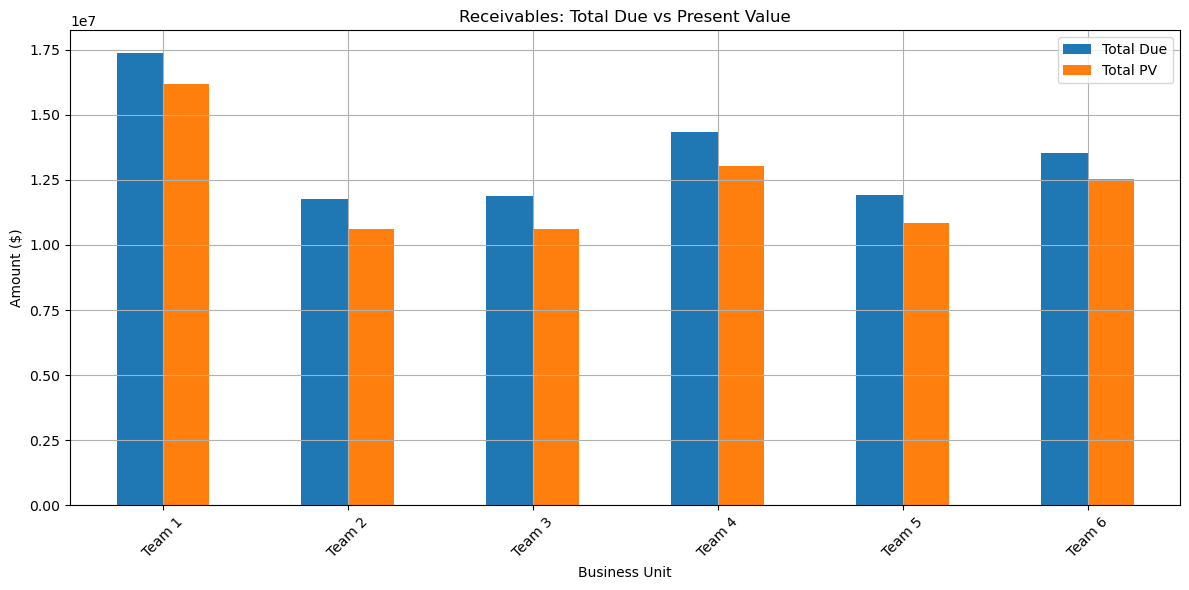

In [4]:
df.plot(
    x='Business Unit',
    y=['Total Due', 'Total PV'],
    kind='bar',
    figsize=(12, 6),
    title='Receivables: Total Due vs Present Value'
)

plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()